## IBM Data Science Capstone Project
### Marcus Chua 

# Opportunities for upcoming café chains in Seoul, South Korea

## Introduction

### Background

Singapore, a city defined by its world-leading education and trade efficiency, is without a doubt among the most advanced cities in Asia. Its rapid modernisation has transformed the capital into a metropolitan area, making it a perfect entry location for businesses. In a region where cafés have become a part of every city dwellers’ lifestyle, there is a huge demand for more of such businesses to open. 
As Singapore is a city split into 28 districts, I will aim to analyse the problem by looking into existing café venues within the individual districts. More specifically, I will be focusing my research on the 9 central districts in Singapore.

## Data

### Installing Required Software 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline 
import matplotlib as mpl # for data visualisation
import matplotlib.pyplot as plt

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# web scraping tools
!conda install -c conda-forge tabulate --yes

!conda install -c conda-forge bs4 --yes

!conda install -c conda-forge lxml --yes

from bs4 import BeautifulSoup
from tabulate import tabulate

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

### Data Preparation: Web Scraping

I will be using a page from Urban Redevelopment Authority (URA) of Singapore to obtain basic information of the 28 districts.

The page has split the district information into their respective regions in Singapore, so I must write a loop to concatenate the 5 tables on the webpage for the full list.

In [2]:
# Scraping Districts table from Wikipedia page
res = requests.get("https://keylocation.sg/singapore/districts-map")
soup = BeautifulSoup(res.content,'lxml')

# Since Data is scrapped from 5 different tables, running a loop to scrape and concatenate all the tables
for i in range(0,5):
    if i == 0:
        table = soup.find_all('table')[0]
        df = pd.read_html(str(table))
        sgdistricts = df[0]
    elif i != 0:
        table = soup.find_all('table')[i]
        df = pd.read_html(str(table))
        adddistricts = df[0]
        sgdistricts = pd.concat([sgdistricts,adddistricts])
        
# Viewing the table in a dataframe
sgdistricts

,District,Areas,Location
0,1,Marina Area,"Boat Quay, Chinatown, Havelock Road, Marina Sq..."
1,2,CBD,"Anson Road, Chinatown, Neil Road, Raffles Plac..."
2,3,Central South,"Alexandra Road, Tiong Bahru, Queenstown"
3,4,Keppel,"Keppel, Mount Faber, Sentosa, Telok Blangah"
4,5,South West,"Buona Vista, Dover, Pasir Panjang, West Coast"
5,6,City Hall,"City Hall, High Street, North Bridge Road"
6,7,Beach Road,"Beach Road, Bencoolen Road, Bugis, Rochor"
7,8,Little India,"Little India, Farrer Park, Serangoon Road"
8,9,Orchard,"Cairnhill, Killiney, Leonie Hill, Orchard, Oxley"
9,10,Tanglin,"Balmoral, Bukit Timah, Grange Road, Holland, O..."


In [3]:
# Rearranging the concatenated tables
sgdistricts.sort_values(by=['District'], ascending=True, inplace = True)
sgdistricts.reset_index(drop = True, inplace = True)

# Renaming columns for ease of reference / Districts by their formal names
sgdistricts = sgdistricts.rename(columns={"District": "District Number", 'Areas':'District','Location':'Localities'})
abbs = {'CBD':'Downtown', 'Marina Area':'Marina Bay'}
sgdistricts = sgdistricts.replace(abbs)
sgdistricts

,District Number,District,Localities
0,1,Marina Bay,"Boat Quay, Chinatown, Havelock Road, Marina Sq..."
1,2,Downtown,"Anson Road, Chinatown, Neil Road, Raffles Plac..."
2,3,Central South,"Alexandra Road, Tiong Bahru, Queenstown"
3,4,Keppel,"Keppel, Mount Faber, Sentosa, Telok Blangah"
4,5,South West,"Buona Vista, Dover, Pasir Panjang, West Coast"
5,6,City Hall,"City Hall, High Street, North Bridge Road"
6,7,Beach Road,"Beach Road, Bencoolen Road, Bugis, Rochor"
7,8,Little India,"Little India, Farrer Park, Serangoon Road"
8,9,Orchard,"Cairnhill, Killiney, Leonie Hill, Orchard, Oxley"
9,10,Tanglin,"Balmoral, Bukit Timah, Grange Road, Holland, O..."


Scoping down to the 9 districts that we are interested in:

In [4]:
sgdistricts = sgdistricts.loc[[0,1,5,6,7,8,9,10,11],:]
sgdistricts

,District Number,District,Localities
0,1,Marina Bay,"Boat Quay, Chinatown, Havelock Road, Marina Sq..."
1,2,Downtown,"Anson Road, Chinatown, Neil Road, Raffles Plac..."
5,6,City Hall,"City Hall, High Street, North Bridge Road"
6,7,Beach Road,"Beach Road, Bencoolen Road, Bugis, Rochor"
7,8,Little India,"Little India, Farrer Park, Serangoon Road"
8,9,Orchard,"Cairnhill, Killiney, Leonie Hill, Orchard, Oxley"
9,10,Tanglin,"Balmoral, Bukit Timah, Grange Road, Holland, O..."
10,11,Newton,"Chancery, Bukit Timah, Dunearn Road, Newton"
11,12,Toa Payoh,"Balestier, Moulmein, Novena, Toa Payoh"


### Data Preparation: Obtaining Coordinates
I will then use the Geopy client to obtain location data of the districts. The Nominatim.geocode function will enable me to assess the exact coordinates of the districts. The coordinates will be assigned to the districts extracted from the URA tables.

In [5]:
# Converting Districts to a list in preparation for geolocation
districtslist = sgdistricts.loc[:,['District']].values.tolist()

# Using geopy to find the coordinates of each district    
geolocator = Nominatim(user_agent="sg_explorer")
districtslat = []
districtslon = []
for district in districtslist:
    coords = geolocator.geocode(str(district) + ' Singapore')
    lat = coords.latitude
    lon = coords.longitude
    districtslat.append(lat)
    districtslon.append(lon)

# Storing the coordinates in a column within the skdistricts dataframe
sgdistricts['Latitude'] = districtslat
sgdistricts['Longitude'] = districtslon
sgdistricts

,District Number,District,Localities,Latitude,Longitude
0,1,Marina Bay,"Boat Quay, Chinatown, Havelock Road, Marina Sq...",1.275682,103.854617
1,2,Downtown,"Anson Road, Chinatown, Neil Road, Raffles Plac...",1.279395,103.852993
5,6,City Hall,"City Hall, High Street, North Bridge Road",1.293199,103.852582
6,7,Beach Road,"Beach Road, Bencoolen Road, Bugis, Rochor",1.303052,103.862267
7,8,Little India,"Little India, Farrer Park, Serangoon Road",1.306648,103.849269
8,9,Orchard,"Cairnhill, Killiney, Leonie Hill, Orchard, Oxley",1.305272,103.832876
9,10,Tanglin,"Balmoral, Bukit Timah, Grange Road, Holland, O...",1.306044,103.815280
10,11,Newton,"Chancery, Bukit Timah, Dunearn Road, Newton",1.313183,103.838040
11,12,Toa Payoh,"Balestier, Moulmein, Novena, Toa Payoh",1.335391,103.849741


### Visualisation of Districts
Using the information we obtained, we can plot the centre points of the districts using Folium.

In [6]:
# Producing a map of Singapore
dtsg_latitude = geolocator.geocode('Orchard Singapore').latitude
dtsg_longitude = geolocator.geocode('Orchard Singapore').longitude
map_dtsg = folium.Map(location=[dtsg_latitude, dtsg_longitude], zoom_start=12)

# Add district markers to map
for lat, lng, label in zip(sgdistricts['Latitude'], sgdistricts['Longitude'], sgdistricts['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dtsg)  
    
map_dtsg

### Data Preparation: Location Data
Using the Foursquare API, I will attempt to generate a list of food venues within the districts.

First, preparing the query with the appropriate credentials/parameters.

In [7]:
# Preparing access credentials
CLIENT_ID = 'VKHZS52DEQPGYMDSBLE2I5GV1MCXAGRZLI2YOQFKHFKIEODN' # your Foursquare ID
CLIENT_SECRET = 'IZ0H3XN33CHMTCEQPQEYUF2AAZT053YGMWAMPY10YWDG0V5F' # your Foursquare Secret
VERSION = '20200420' # Foursquare API version

# Parameters of my search
LIMIT = 100 # limit of maximum number of venues returned by Foursquare API for each district
radius = 5000 # define radius of the search from the centre of each district (in metres)

##### Side query:
In order to identify the food venues from the list of venues I will obtain, I need to get all the possible food venue types from the subcategory of 'food' in Foursquare. I will write a query and then clean the response to obtain a list of these venues.

In [8]:
# Searching Foursquare categories for types of food venues
venuecategoriesurl = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
foodvenuetypes = []
venuecategories = requests.get(venuecategoriesurl).json()
foodvenues = venuecategories['response']['categories'][3]['categories']

# Storing food venues into a list
for row in foodvenues:
    foodvenuetypes.append(row['name'])

##### Main Query:

Before I begin my main query, I need to define a function.


This function will:
1. Loop through all the districts in my list, and search the vicinity of each district for venues
2. Retrieve the essential information from each venue response, storing them in a dataframe

After which, I will apply the function to the 9 districts.

In [9]:
# Defining a function to get the nearby venues from a given coordinate (i.e. centre of district)
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            r['venue']['name'], 
            r['venue']['location']['lat'], 
            r['venue']['location']['lng'],  
            r['venue']['categories'][0]['name']) for r in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Using the function on the 9 relevant districts
sg_district_venues = getNearbyVenues(names=sgdistricts['District'],
                                   latitudes=sgdistricts['Latitude'],
                                   longitudes=sgdistricts['Longitude']
                                  )

Marina Bay
Downtown
City Hall
Beach Road
Little India
Orchard
Tanglin
Newton
Toa Payoh


### Narrowing down venues to food venues
Using the side query from the previous part, I had obtained a list of food venues. The dataframe of venues will be trimmed using this list. 

As can be seen, 203 of the 479 venues were food venues, which is a huge proportion.

In [10]:
# Checking number of venues
print(sg_district_venues.shape)

# Narrowing down to food venues
sg_district_food_venues = sg_district_venues[sg_district_venues['Venue Category'].isin(foodvenuetypes)]

# Checking number of food venues
print(sg_district_food_venues.shape)

sg_district_food_venues.head()

(473, 7)
(200, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Marina Bay,1.275682,103.854617,NUDE Seafood,1.278993,103.854492,Seafood Restaurant
8,Marina Bay,1.275682,103.854617,OLA Cocina del Mar,1.279242,103.854490,Spanish Restaurant
9,Marina Bay,1.275682,103.854617,Cook & Brew,1.277842,103.851103,Gastropub
17,Downtown,1.279395,103.852993,NUDE Seafood,1.278993,103.854492,Seafood Restaurant
18,Downtown,1.279395,103.852993,Din Tai Fung 鼎泰豐 (Din Tai Fung),1.280548,103.853843,Dumpling Restaurant


### Visualisation of Food Venue popularity by Category

We can now analyse the number and types of different food venues among the districts.

There are 34 food venue categories in Central Singapore, with the majority of them already being coffee shops/cafes. 

With this finding in mind, we will continue our analysis to see if the prevalence of coffee shops/cafes is well-balanced across the districts. If there are districts which do not fall under this trend, we can identify them as potential districts for new outlets.

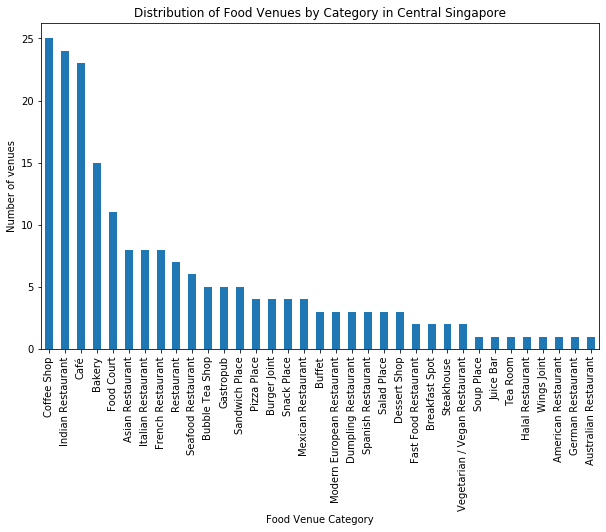

35


In [11]:
# Obtaining food venue counts in a dataframe
food_venue_counts = sg_district_food_venues['Venue Category'].value_counts()

# Plotting the bar graph of food venue counts
food_venue_counts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Food Venue Category') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Distribution of Food Venues by Category in Central Singapore') # add title to the plot

plt.show()
print(len(sg_district_food_venues['Venue Category'].unique()))

## Methodology

### One-Hot Encoding
To prepare the data for further analysis, I will use one-hot encoding to assign binary values to each venue. This will categorise them into their food venue types.

In [12]:
# Using one-hot encoding to convert the venue categories into vectors
sg_onehot = pd.get_dummies(sg_district_food_venues[['Venue Category']], prefix="", prefix_sep="")

sg_onehot['District'] = sg_district_food_venues['District'] 
# move district column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

,District,American Restaurant,Asian Restaurant,Australian Restaurant,Bakery,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Café,Coffee Shop,Dessert Shop,Dumpling Restaurant,Fast Food Restaurant,Food Court,French Restaurant,Gastropub,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Juice Bar,Mexican Restaurant,Modern European Restaurant,Pizza Place,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Tea Room,Vegetarian / Vegan Restaurant,Wings Joint
2,Marina Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,Marina Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,Marina Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18,Downtown,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


After this, I can easily calculate the frequency of each venue appearing in the individual districts.

In [13]:
# Calculating frequency of the venues in each district
sg_grouped = sg_onehot.groupby('District').mean().reset_index()
sg_grouped

,District,American Restaurant,Asian Restaurant,Australian Restaurant,Bakery,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Café,Coffee Shop,Dessert Shop,Dumpling Restaurant,Fast Food Restaurant,Food Court,French Restaurant,Gastropub,German Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Juice Bar,Mexican Restaurant,Modern European Restaurant,Pizza Place,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Tea Room,Vegetarian / Vegan Restaurant,Wings Joint
0,Beach Road,0.000000,0.000000,0.00000,0.125000,0.000000,0.000000,0.000000,0.041667,0.125000,0.125000,0.041667,0.000000,0.000000,0.083333,0.083333,0.000000,0.00000,0.041667,0.041667,0.125000,0.00000,0.041667,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.00000
1,City Hall,0.000000,0.062500,0.03125,0.062500,0.000000,0.031250,0.031250,0.000000,0.125000,0.125000,0.000000,0.031250,0.000000,0.000000,0.062500,0.031250,0.03125,0.000000,0.031250,0.062500,0.03125,0.000000,0.031250,0.031250,0.062500,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03125
2,Downtown,0.000000,0.000000,0.00000,0.046512,0.000000,0.000000,0.023256,0.023256,0.162791,0.209302,0.000000,0.023256,0.000000,0.069767,0.023256,0.046512,0.00000,0.000000,0.023256,0.023256,0.00000,0.069767,0.023256,0.046512,0.023256,0.023256,0.093023,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.00000
3,Little India,0.000000,0.000000,0.00000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.791667,0.000000,0.00000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.00000
4,Marina Bay,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.00000
5,Newton,0.111111,0.111111,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.00000,0.000000,0.000000,0.222222,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,Orchard,0.000000,0.088235,0.00000,0.147059,0.058824,0.117647,0.029412,0.029412,0.147059,0.117647,0.029412,0.029412,0.029412,0.029412,0.029412,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.029412,0.029412,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412,0.000000,0.000000,0.000000,0.00000
7,Tanglin,0.000000,0.000000,0.00000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.125000,0.00000,0.000000,0.125000,0.000000,0.00000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,Toa Payoh,0.000000,0.086957,0.00000,0.043478,0.000000,0.000000,0.000000,0.043478,0.086957,0.173913,0.043478,0.000000,0.043478,0.173913,0.000000,0.000000,0.00000,0.000000,0.043478,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173913,0.000000,0.000000,0.086957,0.000000,0.000000,0.00000


### Identifying Venue Categories by District
With the above calculations, I can display the top food venues (by their frequency) for each district. This will provide me with the information for each of the 9 districts in an easily readable format.

In [14]:
# Displaying the top 5 venues in each of the 9 districts
displaytopvenues = 5

for district in sg_grouped['District']:
    print(district)
    temp = sg_grouped[sg_grouped['District'] == district].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(displaytopvenues))
    print('------------------------------')

Beach Road
                Venue  Frequency
0              Bakery       0.12
1  Italian Restaurant       0.12
2                Café       0.12
3         Coffee Shop       0.12
4          Restaurant       0.08
------------------------------
City Hall
         Venue  Frequency
0         Café       0.12
1  Coffee Shop       0.12
2  Salad Place       0.06
3       Bakery       0.06
4   Restaurant       0.06
------------------------------
Downtown
                Venue  Frequency
0         Coffee Shop       0.21
1                Café       0.16
2      Sandwich Place       0.09
3  Mexican Restaurant       0.07
4          Food Court       0.07
------------------------------
Little India
                           Venue  Frequency
0              Indian Restaurant       0.79
1  Vegetarian / Vegan Restaurant       0.08
2                     Restaurant       0.04
3                    Coffee Shop       0.04
4                         Bakery       0.04
------------------------------
Marina Bay
      

### Storing the Top Venues into a Dataframe
In order to convert the data into a dataframe, I will need to define a function returning the top venues for a district.

In [15]:
# Creating a function which will return the top 5 venues in each district
def returnmostcommonvenues(row, displaytopvenues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:displaytopvenues]

In [16]:
# Converting the data into a dataframe
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = sg_grouped['District']

for ind in np.arange(sg_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = returnmostcommonvenues(sg_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Beach Road,Italian Restaurant,Coffee Shop,Café,Bakery,Restaurant
1,City Hall,Coffee Shop,Café,Asian Restaurant,Bakery,French Restaurant
2,Downtown,Coffee Shop,Café,Sandwich Place,Food Court,Mexican Restaurant
3,Little India,Indian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Bakery,Coffee Shop
4,Marina Bay,Spanish Restaurant,Seafood Restaurant,Gastropub,Wings Joint,Café
5,Newton,Seafood Restaurant,Italian Restaurant,American Restaurant,Café,Asian Restaurant
6,Orchard,Bakery,Café,Bubble Tea Shop,Coffee Shop,Asian Restaurant
7,Tanglin,French Restaurant,Modern European Restaurant,Indian Restaurant,Bakery,Seafood Restaurant
8,Toa Payoh,Food Court,Snack Place,Coffee Shop,Asian Restaurant,Steakhouse


### Clustering the Districts by their Food Profiles
Now that each district has been clearly profiled, I can use KMeans Clustering to group the districts into distinct clusters.

In [17]:
# Using KMeans to perform clustering on the dataframe
# Set number of clusters
kclusters = 5

sg_grouped_clustering = sg_grouped.drop('District', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sg_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 2, 4, 0, 3, 1, 3], dtype=int32)

In [18]:
# Add clustering labels
districts_venues_sorted.insert(0, 'Cluster Number', kmeans.labels_)

sg_merged = sgdistricts

# Merge sgdistricts with districts_venues_sorted to add latitude/longitude for each neighborhood
sg_merged = sg_merged.join(districts_venues_sorted.set_index('District'), on='District')

After clustering the districts, I will then use color codes to visualise them again.

In [19]:
# Visualisation of clusters
# Map of Singapore
map_clusters = folium.Map(location=[dtsg_latitude, dtsg_longitude], zoom_start=13)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.magma(np.linspace(0, 1, len(ys)))
magma = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged['Latitude'], sg_merged['Longitude'], sg_merged['District'], sg_merged['Cluster Number']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=magma[cluster-1],
        fill=True,
        fill_color=magma[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

## Results

Let's view the 5 clusters and the profile of the districts in each of them.

#### Cluster 1
Only one district falls under Cluster 1, where restaurants are commonplace.

In [20]:
sg_merged.loc[sg_merged['Cluster Number'] == 0, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,District,Cluster Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Newton,0,Seafood Restaurant,Italian Restaurant,American Restaurant,Café,Asian Restaurant


#### Cluster 2
Extremely similar to Cluster 1, Cluster 2 seems ideal for exotic cuisine and might possibly be an area active in the evenings (which is unideal for cafés and coffee shops).

In [21]:
sg_merged.loc[sg_merged['Cluster Number'] == 1, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,District,Cluster Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,Tanglin,1,French Restaurant,Modern European Restaurant,Indian Restaurant,Bakery,Seafood Restaurant


#### Cluster 3
Cluster 3 comprises of an extremely niche location, where the overwhelming majority of food venues fall under Indian Vegetarian cuisine (due to religious and racial reasons).

In [22]:
sg_merged.loc[sg_merged['Cluster Number'] == 2, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,District,Cluster Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Little India,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Bakery,Coffee Shop


#### Cluster 4
5 of the 9 districts were clustered together. These 5 districts were notably littered with cafés and coffee shops, with these 2 venues ranking in the top 5 for all districts (except Toa Payoh). Furthermore, the trend in this cluster was a low number of restaurants, with a larger proportion of grab-and-go food venues like bakeries.

In [23]:
sg_merged.loc[sg_merged['Cluster Number'] == 3, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,District,Cluster Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Downtown,3,Coffee Shop,Café,Sandwich Place,Food Court,Mexican Restaurant
5,City Hall,3,Coffee Shop,Café,Asian Restaurant,Bakery,French Restaurant
6,Beach Road,3,Italian Restaurant,Coffee Shop,Café,Bakery,Restaurant
8,Orchard,3,Bakery,Café,Bubble Tea Shop,Coffee Shop,Asian Restaurant
11,Toa Payoh,3,Food Court,Snack Place,Coffee Shop,Asian Restaurant,Steakhouse


#### Cluster 5
Cluster 5 is likely a suitable cluster for fine dining and expensive cuisine, with the common venues being Restaurants. Its profile bears huge resemblance to those of Clusters 1 and 2.

In [24]:
sg_merged.loc[sg_merged['Cluster Number'] == 4, sg_merged.columns[[1] + list(range(5, sg_merged.shape[1]))]]

,District,Cluster Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Marina Bay,4,Spanish Restaurant,Seafood Restaurant,Gastropub,Wings Joint,Café


## Discussion
### Potential Locations for a Café/Coffee Shop
Upon analysis of the clusters, it can be easily identified that Cluster 4 is abundant with cafés and coffee shops. As the accessibility of a coffee place is already extremely high in these districts, it might be fairly difficult for a new business to break into the market here.

On the other hand, the other clusters serve as great options for potential cafés/coffee shops. Cluster 1 and 2, being in close proximity to the districts in Cluster 4, will provide alternative spots close by for regular coffee hunters. Cluster 3 has the most promising location, but it might be tougher to create a demand for coffee in an area considered to be an enclave. Cluster 5 will be a potential area for cafés/coffee shops too, but there are a number of existing cafés which could pose as some competition.

In all, Clusters 1, 2 and 5 provide the greatest potential. Cluster 3 and 4 can definitely be considered also, but other factors will have to be considered too. For example, the demographics/rental price of a location in these districts.

### Limitations of the Research
Some possible limitations of my research will include the currency of the Singapore Districts data from URA. While the profiling of districts by the District Numbers are somewhat accurate, the classification method using the District Numbers has been slowly phased out by the government in an attempt to urbanise the entire Singapore as a whole. As such, some of the district's profiles might continue to evolve and make the analysis less relevant than it can be right now as compared to another 3-5 years in the future.

Another limitation linked to the data used could be the accuracy of the Foursquare information. While Foursquare is constantly updated, new cafés and coffee shops are constantly popping up every other week. The data might take a while to be collected and uploaded.

The use of KMeans clustering has its own limitations too. Even if the optimal number of clusters for the 9 districts is indeed 5, the density of the districts in my clusters differ greatly. If further districts were to be added to the current model, the number of clusters will likely need to be adjusted to ensure that the results of clustering remain useful. Extensions to this research could make use of other techniques like DBSCAN.

## Conclusion
This project has provided deep insight on the food venues in Central Singapore, and can also be used to analyse the potential of setting up various types of food shops in the area. Furthermore, the project has demonstrated how skills in data mining, data cleaning, data visualisation and machine learning can be combined and harnessed to solve a Data Science problem.

On a personal note, the findings of this project reflect the profiles of the districts rather well. Being a local in Singapore, the demographics and amenities of each district did serve as a good reference point for us to learn more about the districts. I hope that the findings will be of interest to my different target audience.